In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Q1：Make scatterplots of each dataset so you can see what they look like.

In [3]:
# loading the dataset
df1 = pd.read_csv("/Users/meviusz/UQ/sem2-23/DATA7703/prac3/w3classif.csv", header= None)
df2 = pd.read_csv("/Users/meviusz/UQ/sem2-23/DATA7703/prac3/w3regr.csv", header= None)
# check the data information
print(f"{df1.head()}\n")
print(f"{df2.head()}\n")

          0         1  2
0  0.475861  0.541139  0
1  1.412233 -1.540877  0
2  0.022608 -0.203143  0
3 -0.047869 -0.499965  0
4  1.701335  0.383024  0

     0           1
0 -5.0  123.867799
1 -4.9   63.138296
2 -4.8    4.163196
3 -4.7   -0.163918
4 -4.6  -33.727488


for  w3classif

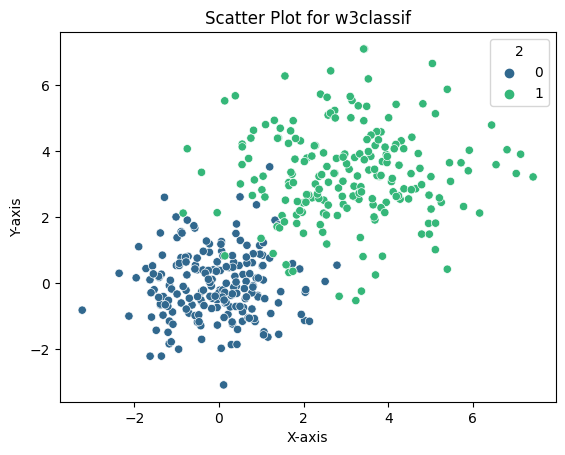

In [7]:
# 使用 Seaborn 创建散点图
sns.scatterplot(data=df1, x=df1.columns[0], y=df1.columns[1], hue=df1.columns[2], palette='viridis')

# 添加标题和标签
plt.title('Scatter Plot for w3classif')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 显示图表
plt.show()

for w3regr

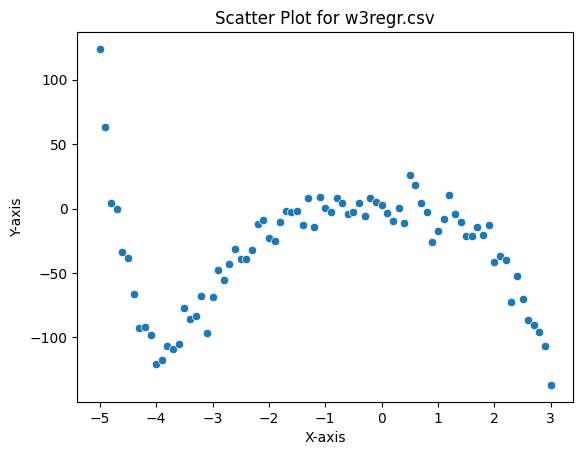

In [4]:
# use the saborn to creat the scatterplot
sns.scatterplot(data=df2,x=df2.columns[0], y=df2.columns[1])

# adding the title and labels
plt.title('Scatter Plot for w3regr.csv')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 显示图表
plt.show()

### Q2:

Randomly shuffle the datasets (i.e. the order of the rows) and split them each into 70% (for training) and 30% (for testing).

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# 随机洗牌数据集，frac代表抽取样本的比例，random_state使得随机可溯
shuffled_data1 = df1.sample(frac=1, random_state=42)
shuffled_data2 = df1.sample(frac=1, random_state=42)

# 将数据集分为训练集（70%）和测试集（30%）
train_data1, test_data1 = train_test_split(shuffled_data1, test_size=0.3, random_state=42)
train_data2, test_data2 = train_test_split(shuffled_data2, test_size=0.3, random_state=42)

#check the training set and the testing set
# print(f"{df1.info()}\n")
# print("Sample size of the training set:", len(train_data1))
# print("Sample size of the testing set:", len(test_data1))


### Q3:

(a) Build a k-NN classifier with k = 3 for dataset w3classif.csv and find the training and test loss (i.e. misclassification rate)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [8]:
# 分割数据，data.iloc[row_indices, column_indices]
X1 = df1.iloc[:, :-1]  # 特征列（第一列和第二列）
y1 = df1.iloc[:, -1]   # 目标列（最后一列）
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# 训练 k-NN 分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X1_train, y1_train)

# 预测和计算误分类率
y1_train_pred = knn.predict(X1_train)

train1_loss = 1 - accuracy_score(y1_train, y1_train_pred)

y1_test_pred = knn.predict(X1_test)
test1_loss = 1 - accuracy_score(y1_test, y1_test_pred)

print("训练误分类率:", train1_loss)
print("测试误分类率:", test1_loss)

训练误分类率: 0.042857142857142816
测试误分类率: 0.008333333333333304


(b) Plot the decision regions for your classifier together with the training and/or test
data points.

In [9]:
from matplotlib.colors import ListedColormap

k-NN Classifier Decision Regions with Training Data

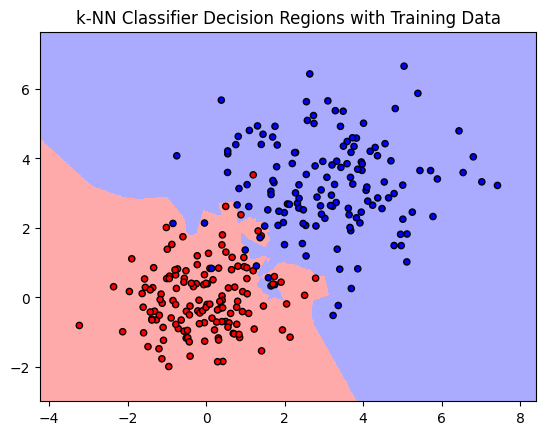

In [10]:
# 创建一个网格来覆盖整个特征空间
h = .02
x_min, x_max = X1_train.iloc[:, 0].min() - 1, X1_train.iloc[:, 0].max() + 1
y_min, y_max = X1_train.iloc[:, 1].min() - 1, X1_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 获取决策区域的预测结果
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 创建一个 colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 绘制决策区域和数据点
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 绘制训练数据点
plt.scatter(X1_train.iloc[:, 0], X1_train.iloc[:, 1], c=y1_train, cmap=cmap_bold, edgecolor='k', s=20)

# 设置图形的范围和标题
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k-NN Classifier Decision Regions with Training Data")

# 显示图形
plt.show()


k-NN Classifier Decision Regions with Training and Test Data

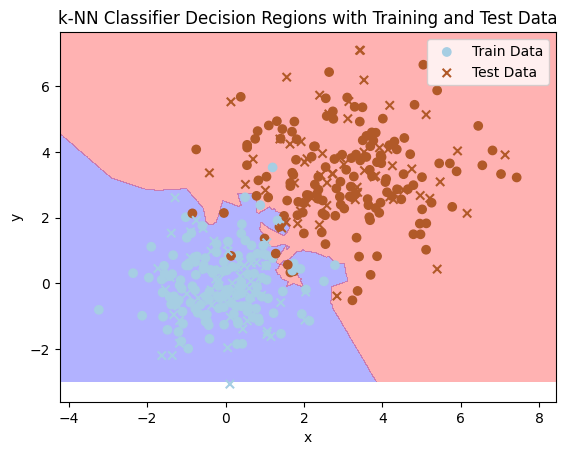

In [11]:
# Create a meshgrid of points
h = 0.01
x_min, x_max = X1_train.iloc[:, 0].min() - 1, X1_train.iloc[:, 0].max() + 1
y_min, y_max = X1_train.iloc[:, 1].min() - 1, X1_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Create a contour plot of decision regions
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=[-np.inf, 0, np.inf], colors=('blue', 'red'), alpha=0.3)

# Scatter plot of training data points
plt.scatter(X1_train.iloc[:, 0], X1_train.iloc[:, 1], c=y1_train, cmap=plt.cm.Paired, marker='o', label='Train Data')

# Scatter plot of test data points
plt.scatter(X1_test.iloc[:, 0], X1_test.iloc[:, 1], c=y1_test, cmap=plt.cm.Paired, marker='x', label='Test Data')

plt.xlabel('x')
plt.ylabel('y')
plt.title('k-NN Classifier Decision Regions with Training and Test Data')
plt.legend()
plt.show()

In [12]:
# 分割数据，data.iloc[row_indices, column_indices]
X1 = df1.iloc[:, :-1]  # 特征列（第一列和第二列）
y1 = df1.iloc[:, -1]   # 目标列（最后一列）
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# 训练 k-NN 分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X1_train, y1_train)

# 预测和计算误分类率
y1_train_pred = knn.predict(X1_train)
train1_loss = 1 - accuracy_score(y1_train, y1_train_pred)

y1_test_pred = knn.predict(X1_test)
test1_loss = 1 - accuracy_score(y1_test, y1_test_pred)

print("训练误分类率:", train1_loss)
print("测试误分类率:", test1_loss)

训练误分类率: 0.042857142857142816
测试误分类率: 0.008333333333333304


(c)Experiment with different k values and see how it affects the loss values and the
decision regions.

K = 1;
训练误分类率: 0.0
测试误分类率: 0.01666666666666672

K = 2;
训练误分类率: 0.03928571428571426
测试误分类率: 0.025000000000000022

K = 3;
训练误分类率: 0.042857142857142816
测试误分类率: 0.008333333333333304

K = 4;
训练误分类率: 0.042857142857142816
测试误分类率: 0.025000000000000022

K = 5;
训练误分类率: 0.03928571428571426
测试误分类率: 0.008333333333333304

影响损失值： 随着 k 值的变化，训练误差和测试误差可能会发生变化。较小的 k 值可能会导致模型对训练数据过度拟合，从而导致较低的训练误差但较高的测试误差。较大的 k 值可能会导致模型的泛化能力增强，因此训练误差和测试误差可能会更加接近。

影响决策区域： 不同的 k 值会导致决策区域的形状和边界发生变化。较小的 k 值可能会导致决策区域更具有噪声，因为模型会更容易受到局部数据的影响。较大的 k 值可能会导致决策区域更平滑，因为它需要考虑更多的邻居。

### Q4:

(a) Build a k-NN regression model with k = 3 for dataset w3regr.csv and find the training and test loss (i.e. sum of squared error).

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [14]:
df2

,0,1
0,-5.0,123.867799
1,-4.9,63.138296
2,-4.8,4.163196
3,-4.7,-0.163918
4,-4.6,-33.727488
...,...,...
76,2.6,-86.646433
77,2.7,-90.548948
78,2.8,-95.476761
79,2.9,-106.979447


In [15]:
# 分割数据
X_regr = df2.iloc[:, :-1]  # 特征列（除了最后一列）
y_regr = df2.iloc[:, -1]    # 目标列（最后一列）

# 分割数据为训练集和测试集
X_regr_train, X_regr_test, y_regr_train, y_regr_test = train_test_split(X_regr, y_regr, test_size=0.3, random_state=42)

# 构建 k-NN 回归模型
knn_regr = KNeighborsRegressor(n_neighbors=3)
knn_regr.fit(X_regr_train, y_regr_train)

# 在训练集上进行预测并计算训练误差
y_regr_train_pred = knn_regr.predict(X_regr_train)
train_loss_regr = mean_squared_error(y_regr_train, y_regr_train_pred)

# 在测试集上进行预测并计算测试误差
y_regr_test_pred = knn_regr.predict(X_regr_test)
test_loss_regr = mean_squared_error(y_regr_test, y_regr_test_pred)

print("训练误差（平方误差）:", train_loss_regr)
print("测试误差（平方误差）:", test_loss_regr)

训练误差（平方误差）: 111.11508496316749
测试误差（平方误差）: 552.831346754702


(b) Plot the training and/or test data together with the predicted “function” of the
model.

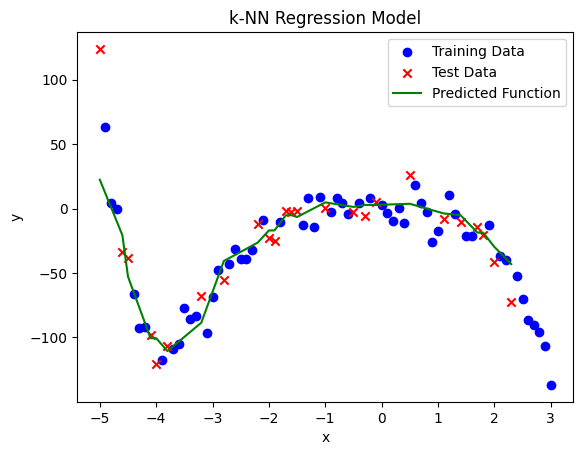

In [16]:
# Sort the test data for plotting
sorted_indices = np.argsort(X_regr_test.iloc[:, 0])
X_test_sorted = X_regr_test.iloc[sorted_indices, :]
test_pred_sorted = y_regr_test_pred[sorted_indices]

# Plot the training data
plt.scatter(X_regr_train, y_regr_train, color='blue', label='Training Data')

# Plot the test data
plt.scatter(X_regr_test, y_regr_test, color='red', marker='x', label='Test Data')

# Plot the predicted function
plt.plot(X_test_sorted, test_pred_sorted, color='green', label='Predicted Function')

plt.xlabel('x')
plt.ylabel('y')
plt.title('k-NN Regression Model')
plt.legend()
plt.show()

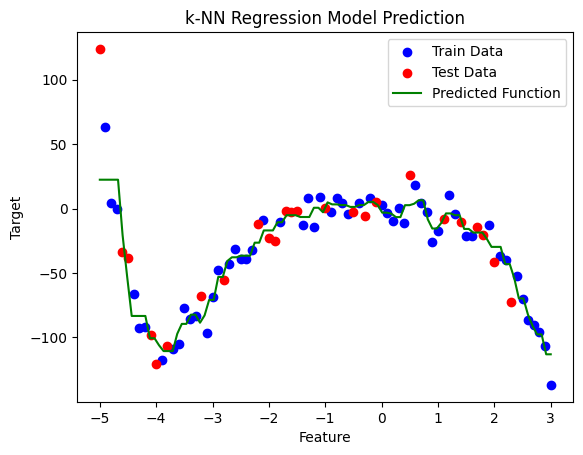

In [25]:
# Plotting training and test set data
plt.scatter(X_regr_train, y_regr_train, color='blue', label='Train Data')
plt.scatter(X_regr_test, y_regr_test, color='red', label='Test Data')

# Plotting the predictive function of the model
x_range = np.linspace(X_regr.min(), X_regr.max(), num=100)
y_range_pred = knn_regr.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_range_pred, color='green', label='Predicted Function')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('k-NN Regression Model Prediction')
plt.legend()
plt.show()


尽管两段代码中的k值相同，但绘制预测函数的方式以及数据的排序方式会影响图像的平滑程度和外观。让我们详细比较一下：

第一段代码：

使用np.argsort对测试数据进行排序，以便绘制预测函数的曲线时是按照顺序连接的。
使用排序后的测试数据和预测结果绘制预测函数的曲线。
因为测试数据在x轴上是有序的，所以预测函数的曲线在x轴上是平滑连接的。
第二段代码：

使用np.linspace生成一个均匀分布的范围，用于绘制预测函数曲线。这个范围在x轴上均匀分布，不一定与测试数据点相对应。
根据生成的范围，计算并绘制预测函数的曲线。由于这个范围在x轴上均匀分布，曲线可能会显得更加平滑。
因此，尽管两种方法都使用相同的k值，但在绘制预测函数时，第一段代码中的排序方式可能会导致曲线在测试数据点之间呈现平滑的外观，而第二段代码中的方法会根据生成的范围绘制更平滑的曲线。这就是为什么两个图像在平滑程度上可能会有差异的原因。

---

(c) Experiment with different k values and see how it affects the loss values and the
predicted function.

K = 1;
训练误差（平方误差）: 0.0
测试误差（平方误差）: 445.65897499336256

K = 2;
训练误差（平方误差）: 66.74976452063268
测试误差（平方误差）: 526.6112393755691

K = 3;
训练误差（平方误差）: 111.11508496316749
测试误差（平方误差）: 552.831346754702

K = 4;
训练误差（平方误差）: 158.70965549015202
测试误差（平方误差）: 736.9625778981631

K = 5;
训练误差（平方误差）: 245.39982297072586
测试误差（平方误差）: 911.9227090173451

影响损失值： 随着 k 值的变化，训练误差和测试误差可能会发生变化。较小的 k 值可能导致模型对训练数据过度拟合，导致较低的训练误差但较高的测试误差。较大的 k 值可能会导致模型的泛化能力增强，从而训练误差和测试误差更加接近。

影响预测函数： 不同的 k 值会导致预测函数的平滑程度和变化。较小的 k 值会导致预测函数在局部区域内出现较大的变化，因为它主要受到少数近邻的影响。较大的 k 值会导致预测函数更平滑，因为它需要考虑更多的邻居，从而减少了局部噪声的影响。

### Q5:

(a) Build a decision tree classifier for dataset w3classif.csv and find the training and
test loss (i.e. misclassification rate).

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
# 特征和目标列
X = df1.iloc[:, :-1]  # 特征列
y = df1.iloc[:, -1]    # 目标列

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 构建决策树分类器并设置最大深度
max_depth = 3  # 设置最大深度
decision_tree_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# 在训练集上进行预测并计算训练误差
y_train_pred = decision_tree_classifier.predict(X_train)
train_loss = 1 - accuracy_score(y_train, y_train_pred)

# 在测试集上进行预测并计算测试误差
y_test_pred = decision_tree_classifier.predict(X_test)
test_loss = 1 - accuracy_score(y_test, y_test_pred)

print("训练误分类率:", train_loss)
print("测试误分类率:", test_loss)

训练误分类率: 0.042857142857142816
测试误分类率: 0.01666666666666672


(b) Plot the decision regions for your classifier together with the training and/or test
data points.

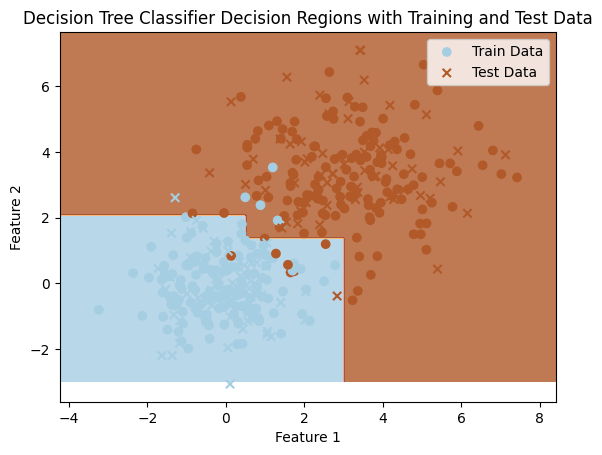

In [20]:

# 生成网格覆盖特征空间
h = .02  # 步长
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 对网格中的每个点进行预测
Z = decision_tree_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策区域
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# 绘制训练集和测试集数据点
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', label='Train Data')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', label='Test Data')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Classifier Decision Regions with Training and Test Data')
plt.legend()
plt.show()

(c) Experiment with different maximum depth values and see how it affects the loss
values and the decision regions.

max_depth = 1
训练误分类率: 0.08214285714285718
测试误分类率: 0.05833333333333335

max_depth = 2
训练误分类率: 0.0535714285714286
测试误分类率: 0.025000000000000022

max_depth = 3
训练误分类率: 0.042857142857142816
测试误分类率: 0.01666666666666672

max_depth = 4
训练误分类率: 0.025000000000000022
测试误分类率: 0.025000000000000022

max_depth = 5
训练误分类率: 0.010714285714285676
测试误分类率: 0.025000000000000022

影响训练和测试误差： 最大深度的增加可能会导致模型过拟合（过度匹配训练数据），因为模型在训练数据上可以更精确地拟合。因此，随着最大深度的增加，训练误差可能会减小，但测试误差可能会增加，因为模型在未见过的数据上的泛化能力可能会下降。

影响决策区域： 最大深度的不同值会导致决策树的分支更浅或更深，从而影响决策区域的形状。较大的最大深度可能会导致更复杂的决策区域，可以更好地拟合训练数据，但可能会导致过拟合。较小的最大深度可能会导致决策区域较简单，模型的泛化能力可能会更好。

### Q6:

(a) Build a decision tree regression model for dataset w3regr.csv and find the training
and test loss (i.e. sum of squared error).

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
# 构建决策树回归模型
max_depth = 3
tree_regr = DecisionTreeRegressor(max_depth=max_depth)
tree_regr.fit(X_regr_train, y_regr_train)

# 在训练集上进行预测并计算训练误差
y_regr_train_pred = tree_regr.predict(X_regr_train)
train_loss_regr = mean_squared_error(y_regr_train, y_regr_train_pred)

# 在测试集上进行预测并计算测试误差
y_regr_test_pred = tree_regr.predict(X_regr_test)
test_loss_regr = mean_squared_error(y_regr_test, y_regr_test_pred)

print("训练误差（均方误差）:", train_loss_regr)
print("测试误差（均方误差）:", test_loss_regr)

训练误差（均方误差）: 328.5210936937694
测试误差（均方误差）: 883.01738997631


(b) Plot the training and/or test data together with the predicted “function” of the
model.

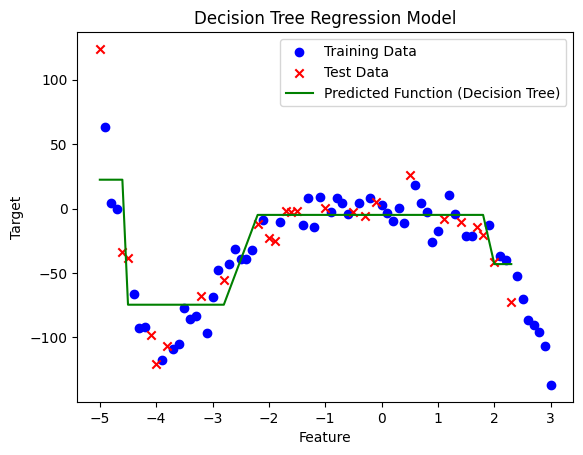

In [27]:
# 排序测试数据以便绘制
sorted_indices = np.argsort(X_regr_test.iloc[:, 0])
X_test_sorted = X_regr_test.iloc[sorted_indices, :]
test_pred_tree_sorted = y_regr_test_pred[sorted_indices]

# 绘制训练数据、测试数据和预测函数
plt.scatter(X_regr_train, y_regr_train, color='blue', label='Training Data')
plt.scatter(X_regr_test, y_regr_test, color='red', marker='x', label='Test Data')
plt.plot(X_test_sorted, test_pred_tree_sorted, color='green', label='Predicted Function (Decision Tree)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Decision Tree Regression Model')
plt.legend()
plt.show() 


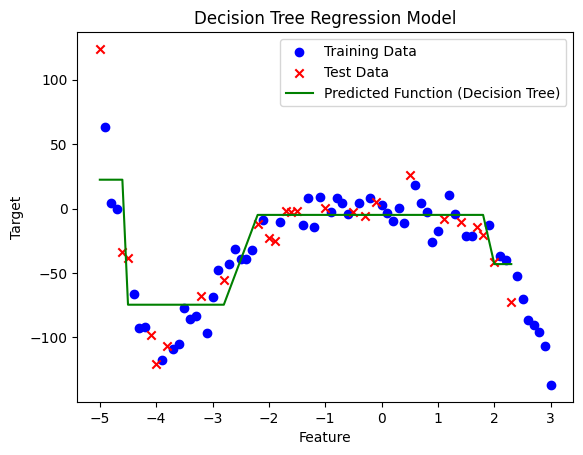

In [26]:
# Sort the test data for plotting
sorted_indices = np.argsort(X_regr_test.iloc[:, 0])
X_test_sorted = X_regr_test.iloc[sorted_indices, :]
test_pred_tree_sorted = y_regr_test_pred[sorted_indices]

# Plot the training data
plt.scatter(X_regr_train, y_regr_train, color='blue', label='Training Data')

# Plot the test data
plt.scatter(X_regr_test, y_regr_test, color='red', marker='x', label='Test Data')

# Plot the predicted function from the Decision Tree model
plt.plot(X_test_sorted, test_pred_tree_sorted, color='green', label='Predicted Function (Decision Tree)')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Decision Tree Regression Model')
plt.legend()
plt.show()

(c) Experiment with different maximum depth values and see how it affects the loss
values and the predicted function.